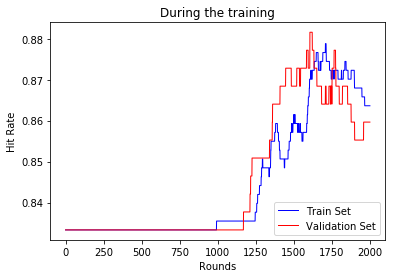

In [1]:
import numpy as np
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
import scipy.sparse
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action = "ignore", category = RuntimeWarning)

# load the data file
data = load_svmlight_file("australian_scale.txt")

# split the data into training set and validation set
X_train, X_test, Y_train, Y_test = train_test_split(data[0], data[1], test_size=0.33, random_state=42)
X_train = np.asarray(scipy.sparse.csr_matrix(X_train).todense())
Y_train = np.asarray(scipy.sparse.csr_matrix(Y_train).todense())
X_test = np.asarray(scipy.sparse.csr_matrix(X_test).todense())
Y_test = np.asarray(scipy.sparse.csr_matrix(Y_test).todense())

row = X_train.shape[0]
column = X_train.shape[1]
testrow = X_test.shape[0]
testcolumn = X_test.shape[1]

# Initialize the parameter
X = np.hstack((X_train, np.ones((row, 1))))  # Let the last column in X to be 1
learning_rate = 0.000001
W = np.zeros((column + 1, 1))  # Merge the W and b
gradient_rounds = 2000  # rounds for training
xplot = []
yplot = []
yplotV = []
for t in range(gradient_rounds):
    sum = 0
    for each in range(row):
        it = np.reshape(X[each], (1, column + 1))  # The random row
        if (Y_train.T[each] * (np.dot(W.T, it.T))[0]) < 1:  # max(0, Y_train.T[random_num] * (np.dot(W.T, it.T)))
            # then update the W
            sum += np.reshape(np.dot(Y_train.T[each], it),(column + 1, 1))
    W+=learning_rate*sum
    # Computing the correct
    xplot.append(t)
    correct = 0
    rate = 0
    # Compute the correct rate in train set
    for i in range(row):
        if np.dot(X[i], W)[0] > 0:
            judge = True
        else:
            judge = False
        if judge == (Y_train.T[i] > 0):
            correct += 1  # Hit!
    rate = correct / row
    yplot.append(rate)
    correct = 0
    rate = 0
    # Compute the correct rate in validation set
    for i in range(testrow):
        eachx = X_test[i]
        x = np.hstack((eachx, 1))
        if np.dot(x, W)[0] > 0:
            judge = True
        else:
            judge = False
        if judge == (Y_test.T[i] > 0):
            correct += 1  # Hit!
    rate = correct / testrow
    yplotV.append(rate)

plt.figure(1)
plt.subplot(111)
plt.title('During the training')
plt.xlabel('Rounds')
plt.ylabel('Hit Rate')
plt.plot(np.array(xplot), np.array(yplot), color="blue", linewidth=1.0, linestyle="-", label="Train Set")
plt.plot(np.array(xplot), np.array(yplotV), color="red", linewidth=1.0, linestyle="-", label="Validation Set")

plt.legend(loc='lower right')

plt.show()
